# FINAL CAPSTONE PROJECT 
## submitted by :- Anshul Gupta                                                                                                                            

## BATTLE OF THE NEIGHBORHOODS

THIS NOTEBOOK WILL BE USED FOR ANSHUL'S DATA SCIENCE CAPSTONE PROJECT

In [95]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import requests
import json

!pip -q install geopy
from geopy.geocoders import Nominatim # to convert an address into latitude and longitude values
import requests # library to handle requests


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors

from sklearn.cluster import KMeans # import k-means for clustering

!pip -q install geocoder # install the Geocoder
import geocoder
import time # import time

!pip -q install folium
import folium # map rendering library
print('completed importing libraries')

completed importing libraries


In [96]:
print('hello capstone project course')

hello capstone project course


### GETTING COORDINATES OF CURRENT RESIDENCE

In [97]:
address='Chandigarh,India'
geolocator=Nominatim()
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('the geographical coordinates the chandigarh are {},{}'.format(latitude,longitude))

the geographical coordinates the chandigarh are 30.7194022,76.7646552


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


In [98]:
neigh_lat=latitude
neigh_long=longitude
neigh_name=address

In [133]:
# The code was removed by Watson Studio for sharing.

cell is hidden because it contains credentials
CREDENTIALS cell


### USING FOURSQUARE API CALLS TO GET NEARBY VENUES IN CHANDIGARH

In [100]:
radius=3000
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID,
CLIENT_SECRET,
VERSION,
neigh_lat,
neigh_long,
radius,
LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YQWIXLNXHCLQORDT220OEKHDCGFNKHFELR3T3QEMG4WQR341&client_secret=VBSK5Q1VUDUYAEUH3XZ5BEEPHZODU13MHSUXKKPT0MJ45VIP&v=20180604&ll=30.7194022,76.7646552&radius=3000&limit=30'

In [101]:
results=requests.get(url).json()

In [102]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [103]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.shape

(30, 4)

In [104]:
nearby_venues

,name,categories,lat,lng
0,Nik Bakers,Bakery,30.721447,76.760176
1,JW Marriott Hotel Chandigarh,Hotel,30.726698,76.766827
2,The Coffee Bean & Tea Leaf,Coffee Shop,30.729740,76.773197
3,chef's gateway | Jagat Singh & Sons Agencies,Organic Grocery,30.728041,76.770405
4,Chandigarh | Mohali | ਚੰਡੀਗੜ੍ਹ,City,30.712486,76.773030
5,Ovenfresh,American Restaurant,30.721800,76.760700
6,Aroma 22,Hotel Bar,30.730059,76.773615
7,Classic 44,Bakery,30.714746,76.751775
8,Subway,Sandwich Place,30.719116,76.759693
9,Barista,Café,30.722207,76.761461


### Creating map of chandigarh with venues 

In [105]:
import folium
map_chandi=folium.Map(location=[latitude,longitude],zoom_start=12)
#adding a marker to represent the select location
folium.CircleMarker(
[latitude,longitude],
radius=300,
color='blue',
popup=neigh_name,
fill=True,
fill_color='blue',
fill_opacity=0.05).add_to(map_chandi)
map_chandi


In [106]:
for lat,lng,name,category in zip(nearby_venues['lat'],nearby_venues['lng'],nearby_venues['name'],nearby_venues['categories']):
    label='{},{}'.format(name,category)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=3,
    color='red',
    popup=label,
    fill=True,
    fill_color='red',
    fill_opacity=0.8).add_to(map_chandi)
map_chandi

# Manhattan neighborhood data analysis and visualisation 
## Neighborhood data was produced  using foursquare api in LAB course. thus it is read directly here 
### The neighborhoods are clustered on the basis of the venues and their popularity and thus the data contains clustered neighborhoods

In [140]:
# The code was removed by Watson Studio for sharing.

cell is hidden because it contains credentials


In [141]:
manhatneigh = pd.read_csv(body)
manhatneigh.head()


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


## top ten clustered venues containing neighborhood data of manhattan

In [138]:
# The code was removed by Watson Studio for sharing.

cell is hidden because it contains credentials


In [139]:
topneigh= pd.read_csv(body)
topneigh

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Spa,Bakery,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Dessert Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Latin American Restaurant,Deli / Bodega,Tapas Restaurant,New American Restaurant,Park
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Lounge,Restaurant,Café,Pizza Place,Wine Bar,American Restaurant,Bakery,Frozen Yogurt Shop,Deli / Bodega
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Mexican Restaurant,Sandwich Place,Indian Restaurant,Sushi Restaurant,Park,Deli / Bodega,Yoga Studio
5,Manhattan,Manhattanville,40.816934,-73.957385,1,Coffee Shop,Seafood Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Park,Deli / Bodega,Supermarket,Boutique,Spanish Restaurant
6,Manhattan,Central Harlem,40.815976,-73.943211,1,African Restaurant,Bar,French Restaurant,American Restaurant,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Spa,Dessert Shop,Beer Bar
7,Manhattan,East Harlem,40.792249,-73.944182,0,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Deli / Bodega,Taco Place,Gym,Grocery Store,Beer Bar,Liquor Store
8,Manhattan,Upper East Side,40.775639,-73.960508,1,Italian Restaurant,Coffee Shop,Exhibit,Art Gallery,Bakery,Gym / Fitness Center,Juice Bar,Pizza Place,French Restaurant,Yoga Studio
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Pizza Place,Diner,Mexican Restaurant,Sushi Restaurant,Japanese Restaurant


### GETTING COORDINATES OF MANHATTAN,NY

In [109]:
#finding coords of manhattan
address1 = 'Manhattan,NY'
geolocator = Nominatim(user_agent="locator")
location = geolocator.geocode(address1)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of manhattan,new york are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of manhattan,new york are 40.7896239, -73.9598939.


### CREATING MAP OF MANHATTAN

In [110]:
#creating map of manhattan
kclus=5
map_clus=folium.Map(location=[latitude1,longitude1],zoom_start=12)


In [111]:
#setting color scheme for clusters
x=np.arange(kclus)
ys=[i+x+(i*x)**2 for i in range(kclus)]
color_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.rgb2hex(i) for i in color_array]

In [112]:
#marker addition of top 10 clustered neighborhood with venues in manhattan on the manhattan map
markercolors=[] #empty list
for lat,lng,neigh,clus in zip(topneigh['Latitude'],topneigh['Longitude'],topneigh['Neighborhood'],topneigh['Cluster Labels']):
    label=folium.Popup(str(neigh)+',cluster=' + str(clus),parse_html=True)
    folium.CircleMarker(
    [lat,lng],
        radius=25,
        popup=label,
        color=rainbow[clus-1],
        fill=True,
        fill_color=rainbow[clus-1],
        fill_opacity=0.1).add_to(map_clus)
map_clus

### ANALYSING PARTICULAR CLUSTER AND PRINTING VENUES 

### Map above presents the most similar neighborhoods to Chandigarh home (since neighborhood data was clustered on the basis of venues around it and thus we find that cluster 1 resembles chandigarh the most 

#### thus we analyse the cluster 1 neighborhoods 

In [113]:
bestclus=1 # best cluster number 
topneigh.loc[topneigh['Cluster Labels']==bestclus,topneigh.columns[[1]+list(range(5,15))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Deli / Bodega,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place,Department Store
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Spa,Bakery,Hotpot Restaurant,Optical Shop,Vietnamese Restaurant,Salon / Barbershop,Dessert Shop
5,Manhattanville,Coffee Shop,Seafood Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Park,Deli / Bodega,Supermarket,Boutique,Spanish Restaurant
6,Central Harlem,African Restaurant,Bar,French Restaurant,American Restaurant,Seafood Restaurant,Chinese Restaurant,Caribbean Restaurant,Spa,Dessert Shop,Beer Bar
8,Upper East Side,Italian Restaurant,Coffee Shop,Exhibit,Art Gallery,Bakery,Gym / Fitness Center,Juice Bar,Pizza Place,French Restaurant,Yoga Studio
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Pizza Place,Diner,Mexican Restaurant,Sushi Restaurant,Japanese Restaurant
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Cocktail Bar,Burger Joint,Café,Gym,Gym / Fitness Center,Mexican Restaurant
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Coffee Shop,Indian Restaurant,Bakery,Café,Mediterranean Restaurant,Restaurant,Pub
15,Midtown,Hotel,Coffee Shop,Clothing Store,Bookstore,American Restaurant,Theater,Bakery,Sporting Goods Shop,Café,French Restaurant
16,Murray Hill,Sandwich Place,Coffee Shop,American Restaurant,Japanese Restaurant,Italian Restaurant,Gym / Fitness Center,Mediterranean Restaurant,Hotel,Gym,Chinese Restaurant


### considering my personal priorities of venues are as follows:- 
1. gym/fitness center
2. some kind of eatery nearby 
3. 

## Visualising apartments on rent in manhattan 
### manhattan rental data is scrapped from website and a csv file is made which is read directly

In [136]:
# The code was removed by Watson Studio for sharing.

cell is hidden because it contains credentials


In [137]:
rentdf = pd.read_csv(body)
rentdf.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


### getting coordinates of apartments on rent in manhattan using nominatim()

In [115]:
for n in range(len(rentdf)):
    add=rentdf['Address'][n]+',Manhattan,NY'
    geolocator=Nominatim()
    location=geolocator.geocode(add)
    latitude = location.latitude
    longitude=location.longitude
    print(n,latitude,longitude)
    rentdf['Lat'][n]=latitude
    rentdf['Long'][n]=longitude
    time.sleep(1)
print('got all coordinates')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0 40.7997711 -73.9662127


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1 40.7885173 -73.9551184
2 40.7997711 -73.9662127
3 40.7303374 -74.0024762
4 40.7441181 -73.9952986
5 40.72963089473684 -74.00443968421052
6 40.7905011 -73.971814
7 40.774324449999995 -73.9528355356558
8 40.7792308 -73.9509243
9 40.7729692 -73.9582529
10 40.7457738 -73.9996226
11 40.7431532 -73.9798226
12 40.7431532 -73.9798226
13 40.7788519 -73.9480698
14 40.7431532 -73.9798226
15 40.7457738 -73.9996226
16 40.7441181 -73.9952986
17 40.7682243 -73.9606386
18 40.744392000000005 -73.99372200085574
19 40.7729692 -73.9582529
20 40.7729692 -73.9582529
21 40.7729692 -73.9582529
22 40.78274985 -73.95038377039515
23 40.728045550000004 -74.0014756325424
24 40.7086724 -74.0134276
25 40.7759672 -73.9556097
26 40.7842778 -73.9814338
27 40.778834 -73.953789
28 40.8230404 -73.94884121870199
29 40.7911766 -73.9523161546756
30 40.71405142857143 -74.00960814285715
31 40.714302700000005 -74.00768024999999
32 40.762229649999995 -73.97568077926353
33 40.751151199999995 -74.00407044750922
34 40.74873275 -7

In [116]:
rentdf.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788517,-73.955118
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730337,-74.002476
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


## rent in manhattan stats & analysis

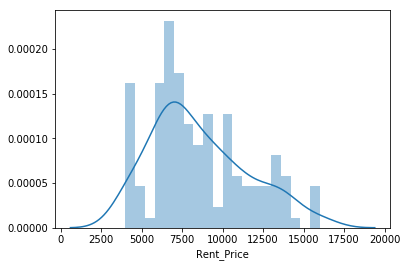

In [117]:
import seaborn as sns
sns.distplot(rentdf['Rent_Price'],bins=20)

#### Observation from above plot-  maximum rental apartments have rent close from 6000 to 7000 US dollar which is greater than my budget but being developed nation with better facilities they'll definitely charge more 

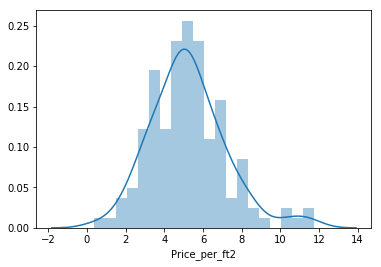

In [118]:
sns.distplot(rentdf['Price_per_ft2'],bins=20)

#### Observation from above plot- most are charging around 5.5 to 6 dollar per square feet 

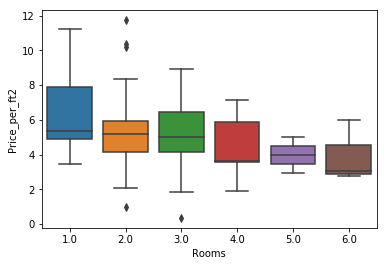

In [119]:
sns.boxplot(x='Rooms',y='Price_per_ft2',data=rentdf)

#### Observation from above plot- if we consider 2 room apartment then median is around 5.6(price_per_ft2) i.e 50 percent of apartments on rent with 2 rooms are having per square foot price less than 5.5 US dollar which seems a good deal ! 

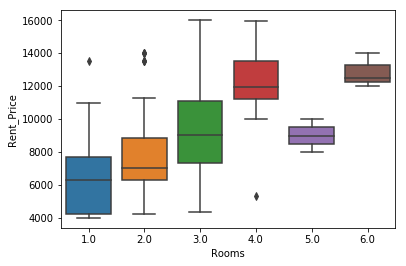

In [120]:
sns.boxplot(x='Rooms',y='Rent_Price',data=rentdf)

#### Observtion from above plot- 
#### 1 considering 1 room and 2 room apartments on rent, we can easily find apartment under 7500 US dollar.
#### 2 median of 1 room apartments is around 6500 rent price and median of 2 room apartments is above 7000 rent price 
#### 3 there is a outlier in 4 room apartments who i charging less than 6000 US dollar and thus also seems like a great deal 

In [121]:
print(latitude1,longitude1) # coords of manhattan ,NY

40.7896239 -73.9598939


In [122]:
map_rentdf=folium.Map(location=[latitude1,longitude1],zoom_start=12)
for lat,lng,label in zip(rentdf['Lat'],rentdf['Long'],rentdf['Address']+','+rentdf['Rent_Price'].astype(str)+'$'):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=2,
    popup=label,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.8).add_to(map_rentdf)
map_rentdf

### Superimposed map of rental places in manhatttan(map_rentdf) over the top 10 clustered neighborhood with venues in manhattan(map_clus)

In [123]:
for lat,lng,label in zip(rentdf['Lat'],rentdf['Long'],rentdf['Address']+','+rentdf['Rent_Price'].astype(str)+'$'):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=2,
    popup=label,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.8).add_to(map_clus)
map_clus


#### Now apartments on rent can be compared by checking the venues around it and checking the rent price

## Metro stations in Manhattan,NY data 

#### the data was gathered from github , a user had produced a CSV file of metro stations names with their addresses and geographical coordinates.

In [134]:
# The code was removed by Watson Studio for sharing.

cell is hidden because it contains credentials


In [135]:
sub_df= pd.read_csv(body)
sub_df.head()

,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [125]:
#removing duplicates
sub_df=sub_df.drop_duplicates(subset=['lat','long'],keep='last').reset_index(drop=True)
sub_df.head()

,sub_station,sub_address,lat,long
0,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
1,Broadway-Lafayette St Station,"E Houston St, New York, 10012, United States",40.725684,-73.997726
2,Bowery Station,"Bowery, New York, NY 10002, USA",40.720217,-73.993720
3,34th Street-Hudson,"380-394 11th Ave, New York, NY 10001, USA",40.753038,-74.003860
4,72 Street Subway Station,"2nd Ave, New York, NY 10021, USA",40.766865,-73.959779


### METRO STATIONS IN MANHATTAN,NY MAP

In [126]:
map_ms=folium.Map(location=[latitude1,longitude1],zoom_start=12)
for lat,lng,name in zip(sub_df['lat'],sub_df['long'],sub_df['sub_station']):
    label=folium.Popup(name,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=22,
    popup=label,
    color='black',
    fill=True,
    fill_color='black',
    fill_opacity=0.2).add_to(map_ms)
map_ms

## RESULTING MAP WITH EVERYTHING MARKED

In [127]:
for lat,lng,name in zip(sub_df['lat'],sub_df['long'],sub_df['sub_station']):
    label=folium.Popup(name,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=22,
    popup=label,
    color='black',
    fill=True,
    fill_color='black',
    fill_opacity=0.2).add_to(map_clus)
map_clus

## FINAL MAP IS ABOVE

### 1. THE MAP ABOVE IS COMBINED MAP WITH ALL THE NECESSARY MARKERS
#### BLACK MARKERS TELL THE INFORMATION OF METRO STATIONS
#### GREEN MARKERS TELL THE INFORMATION OF APARTMENTS ON RENT 
#### RED MARKERS TELL THE INFORMATION OF CLUSTER=0 NEIGHBORHOODS 
#### PURPLE MARKERS TELL THE INFORMATION OF CLUSTER=1 NEIGBORHOODS
#### SKY BLUE MARKERS TELL THE INFORMATION OF CLUSTER=2 NEIGHBORHOODS

### 2. we will pick the apartments if its in cluster=1 neighborhood and metro station needs to close 
#### if we have more stations near then the apartments is preferred 
#### also keeping in mind the budget is less than 6k -7k US dollars so it'll be great if we find cheap deal 
#### considering my personal case where i'll be moving alone , no. of rooms won't really affect the decision 

In [128]:
### NEAR CLUS 1 AND METRO STATION
print('70 Pine Street,6188$ OK CHOICE WITH CLOSE NEIGH BUT FAR METRO')
print('60 Fulton Street,6185 $ OK CHOICE WITH CLOSE MTERO BUT FAR NEIGH')
print('U211 East 70th Street,4250$ CHEAP AND V CLOSE TO BOTH')
print('150 East 57th Street,5950$ GOOD CHOICE , PERF RENT, CLOSE NEIGH AND METRO')
print('52 Spring Street,6000$ VV GOOD SURR BY 2 METRO + 2 CLUS 1 NEIGHBORHOOD')
print('182 Bleecker Street,6000$ OK CHOICE')
print('160 East 48th Street,6431$ OK CHOICE ')
print('265 East 66th Street,6425$ OK CHOICE ,CLOSE METRO BUT FAR GOOD NEIGHBORHOOD')
print('333 east 81st street ,4500$ CHEAP BUT FAR METRO AND FAR NEIGHBORHOOD')

70 Pine Street,6188$ OK CHOICE WITH CLOSE NEIGH BUT FAR METRO
60 Fulton Street,6185 $ OK CHOICE WITH CLOSE MTERO BUT FAR NEIGH
U211 East 70th Street,4250$ CHEAP AND V CLOSE TO BOTH
150 East 57th Street,5950$ GOOD CHOICE , PERF RENT, CLOSE NEIGH AND METRO
52 Spring Street,6000$ VV GOOD SURR BY 2 METRO + 2 CLUS 1 NEIGHBORHOOD
182 Bleecker Street,6000$ OK CHOICE
160 East 48th Street,6431$ OK CHOICE 
265 East 66th Street,6425$ OK CHOICE ,CLOSE METRO BUT FAR GOOD NEIGHBORHOOD
333 east 81st street ,4500$ CHEAP BUT FAR METRO AND FAR NEIGHBORHOOD


### considering above picked apartments ,since our budget was below 6000-7000 we find that we can get very cheap deals with preferred neighborhood and close metro station
# RESULT=> U211 East 70th Street, 4250 US dollars CHEAP RIGHT!with nearest metro station being 72 Street Subway Station in Lenox Hill neighborhood ,cluster=1

# thus the apartment is chosen (my personal case)